# Analyzing Crime in Los Angeles

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes = pd.read_csv(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\4_LA_Crimes\crimes.csv')

crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         247988 non-null  int64 
 1   Date Rptd     247988 non-null  object
 2   DATE OCC      247988 non-null  object
 3   TIME OCC      247988 non-null  int64 
 4   AREA NAME     247988 non-null  object
 5   Crm Cd Desc   247988 non-null  object
 6   Vict Age      247988 non-null  int64 
 7   Vict Sex      215740 non-null  object
 8   Vict Descent  215739 non-null  object
 9   Weapon Desc   80087 non-null   object
 10  Status Desc   247988 non-null  object
 11  LOCATION      247988 non-null  object
dtypes: int64(3), object(9)
memory usage: 22.7+ MB


In [4]:
crimes.describe()

,DR_NO,TIME OCC,Vict Age
count,2.479880e+05,247988.000000,247988.000000
mean,2.256571e+08,1317.184662,29.954764
std,5.042345e+06,655.090477,21.901016
min,2.203000e+03,1.000000,-2.000000
25%,2.210130e+08,845.000000,0.000000
50%,2.220131e+08,1400.000000,31.000000
75%,2.310058e+08,1843.000000,45.000000
max,2.399165e+08,2359.000000,99.000000


In [10]:
crimes['TIME OCC'].unique()

array([1700, 1110, 1620, ...,  528,  514,  156], dtype=int64)

In [19]:
# Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

crimes['Hour'] = np.floor(crimes['TIME OCC']/100)

crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17.0
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11.0
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16.0
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12.0
4,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6.0


In [24]:
crimes.groupby('Hour')['DR_NO'].count().sort_values(ascending=False)

Hour
12.0    17065
18.0    14447
17.0    14107
20.0    13325
19.0    13146
16.0    12676
15.0    12671
21.0    12008
14.0    11889
22.0    11697
11.0    11120
13.0    11009
10.0    10720
0.0     10696
23.0    10039
8.0      9600
9.0      9138
1.0      7564
7.0      7011
6.0      7008
2.0      6352
3.0      5564
4.0      4696
5.0      4440
Name: DR_NO, dtype: int64

In [22]:
peak_crime_hour = 12

print(f'The crimes in Los Angeles most occured at {peak_crime_hour} p.m.')

The crimes in Los Angeles most occured at 12 p.m.


In [27]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
# Save as a string variable called peak_night_crime_location.

night_crimes = crimes[(crimes['Hour'] >= 22)|(crimes['Hour'] < 4)]
night_crimes.groupby('AREA NAME')['DR_NO'].count().sort_values(ascending=False)

AREA NAME
Central        4091
77th Street    3362
Hollywood      3299
Newton         2927
Southeast      2884
Olympic        2851
Southwest      2787
Pacific        2773
N Hollywood    2597
Rampart        2480
Northeast      2342
Wilshire       2243
Harbor         2128
West Valley    2106
Van Nuys       2029
Mission        1907
Devonshire     1900
Hollenbeck     1892
West LA        1864
Topanga        1743
Foothill       1707
Name: DR_NO, dtype: int64

In [28]:
peak_night_crime_location = 'Central'

print(f'{peak_night_crime_location} has the most night crimes in Los Angeles.')

Central has the most night crimes in Los Angeles.


In [29]:
# Identify the number of crimes committed against victims of different age groups.
# Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64",
# and "65+" as the index and the frequency of crimes as the values.

age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour,Age Group
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17.0,NaN
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11.0,26-34
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16.0,55-64
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12.0,26-34
4,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6.0,35-44


In [30]:
crimes['Age Group'].value_counts(dropna=False)

Age Group
NaN      62273
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64

In [33]:
victim_ages = crimes['Age Group'].value_counts()

victim_ages

Age Group
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64

## Clean Data

In [34]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   DR_NO         247988 non-null  int64   
 1   Date Rptd     247988 non-null  object  
 2   DATE OCC      247988 non-null  object  
 3   TIME OCC      247988 non-null  int64   
 4   AREA NAME     247988 non-null  object  
 5   Crm Cd Desc   247988 non-null  object  
 6   Vict Age      247988 non-null  int64   
 7   Vict Sex      215740 non-null  object  
 8   Vict Descent  215739 non-null  object  
 9   Weapon Desc   80087 non-null   object  
 10  Status Desc   247988 non-null  object  
 11  LOCATION      247988 non-null  object  
 12  Hour          247988 non-null  float64 
 13  Age Group     185715 non-null  category
dtypes: category(1), float64(1), int64(3), object(9)
memory usage: 24.8+ MB


In [35]:
crimes.describe()

,DR_NO,TIME OCC,Vict Age,Hour
count,2.479880e+05,247988.000000,247988.000000,247988.000000
mean,2.256571e+08,1317.184662,29.954764,12.990116
std,5.042345e+06,655.090477,21.901016,6.548983
min,2.203000e+03,1.000000,-2.000000,0.000000
25%,2.210130e+08,845.000000,0.000000,8.000000
50%,2.220131e+08,1400.000000,31.000000,14.000000
75%,2.310058e+08,1843.000000,45.000000,18.000000
max,2.399165e+08,2359.000000,99.000000,23.000000


### Negative Values for Victim's Age

In [37]:
# Age less than 0 does not make sense.
# There are 33 observations with negative age value.
# Since the number of observations are less than 1% I will drop these rows.

crimes[crimes['Vict Age'] < 0].shape

(33, 14)

In [40]:
crimes.drop(index=crimes[crimes['Vict Age'] < 0].index, inplace=True)
crimes.reset_index(drop=True, inplace=True)

In [41]:
crimes.describe()

,DR_NO,TIME OCC,Vict Age,Hour
count,2.479550e+05,247955.000000,247955.000000,247955.000000
mean,2.256567e+08,1317.207517,29.958912,12.990333
std,5.042295e+06,655.098327,21.899521,6.549062
min,2.203000e+03,1.000000,0.000000,0.000000
25%,2.210130e+08,845.000000,0.000000,8.000000
50%,2.220131e+08,1400.000000,31.000000,14.000000
75%,2.310058e+08,1843.000000,45.000000,18.000000
max,2.399165e+08,2359.000000,99.000000,23.000000


### Missing Values in Victim's Gender

In [57]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247955 entries, 0 to 247954
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   DR_NO         247955 non-null  int64   
 1   Date Rptd     247955 non-null  object  
 2   DATE OCC      247955 non-null  object  
 3   TIME OCC      247955 non-null  int64   
 4   AREA NAME     247955 non-null  object  
 5   Crm Cd Desc   247955 non-null  object  
 6   Vict Age      247955 non-null  int64   
 7   Vict Sex      247955 non-null  object  
 8   Vict Descent  247955 non-null  object  
 9   Weapon Desc   80084 non-null   object  
 10  Status Desc   247955 non-null  object  
 11  LOCATION      247955 non-null  object  
 12  Hour          247955 non-null  float64 
 13  Age Group     185715 non-null  category
dtypes: category(1), float64(1), int64(3), object(9)
memory usage: 24.8+ MB


In [44]:
crimes[crimes['Vict Sex'].isna()].shape

(32248, 14)

In [46]:
crimes['Vict Sex'].value_counts(dropna=False)

Vict Sex
M      101020
F       90801
NaN     32248
X       23855
H          30
-           1
Name: count, dtype: int64

In [51]:
# 'H', '-', and missing values will be replaced with 'X' for 'Unknown'

crimes['Vict Sex'] = crimes['Vict Sex'].map(lambda x: 'X' if x=='H' or x=='-' else x)
crimes['Vict Sex'].fillna('X', inplace=True)

crimes['Vict Sex'].value_counts(dropna=False)

Vict Sex
M    101020
F     90801
X     56134
Name: count, dtype: int64

### Missing Values in Victim's Descendent

In [55]:
crimes['Vict Descent'].value_counts(dropna=False)

Vict Descent
H      75348
W      48587
B      35306
NaN    32249
X      26037
O      19514
A       5610
K       1398
F       1232
C       1210
J        434
V        329
I        322
Z        145
P         83
U         77
D         21
L         20
S         17
G         14
-          2
Name: count, dtype: int64

In [56]:
# '-' and missing values will be replaced with 'X' for 'Unknown'

crimes['Vict Descent'] = crimes['Vict Descent'].map(lambda x: 'X' if x=='-' else x)
crimes['Vict Descent'].fillna('X', inplace=True)

crimes['Vict Descent'].value_counts(dropna=False)

Vict Descent
H    75348
X    58288
W    48587
B    35306
O    19514
A     5610
K     1398
F     1232
C     1210
J      434
V      329
I      322
Z      145
P       83
U       77
D       21
L       20
S       17
G       14
Name: count, dtype: int64

### Weapon Description Feature

In [58]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION', 'Hour', 'Age Group'],
      dtype='object')

In [59]:
crimes['Weapon Desc'].unique()

array([nan, 'VERBAL THREAT',
       'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'PHYSICAL PRESENCE', 'HAMMER', 'UNKNOWN WEAPON/OTHER WEAPON',
       'OTHER KNIFE', 'HAND GUN', 'FIXED OBJECT',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'SEMI-AUTOMATIC PISTOL',
       'BLUNT INSTRUMENT', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'BOTTLE',
       'CLUB/BAT', 'SHOTGUN', 'BELT FLAILING INSTRUMENT/CHAIN', 'MACHETE',
       'ROCK/THROWN OBJECT', 'RIFLE', 'ASSAULT WEAPON/UZI/AK47/ETC',
       'UNKNOWN FIREARM', 'SIMULATED GUN', 'PIPE/METAL PIPE', 'RAZOR',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'FOLDING KNIFE',
       'VEHICLE', 'RAZOR BLADE', 'MACE/PEPPER SPRAY', 'TIRE IRON',
       'EXPLOXIVE DEVICE', 'STICK', 'SCISSORS', 'KITCHEN KNIFE',
       'REVOLVER', 'FIRE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'STUN GUN',
       'OTHER FIREARM', 'CONCRETE BLOCK/BRICK', 'SWITCH BLADE',
       'ICE PICK', 'CAUSTIC CHEMICAL/POISON', 'OTHER CUTTING INSTRUMENT',
       'SAWED OFF RIFLE/SHO

In [61]:
# Filter and look more into missing weapon descriptions.

null_weapons = crimes[crimes['Weapon Desc'].isna()]

null_weapons.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour,Age Group
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,NaN,Invest Cont,13600 MARINA POINT DR,17.0,NaN
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11.0,26-34
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16.0,55-64
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12.0,26-34
4,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6.0,35-44


In [66]:
null_weapons['Crm Cd Desc'].value_counts().reset_index().head(5)

,Crm Cd Desc,count
0,VEHICLE - STOLEN,25784
1,THEFT OF IDENTITY,23004
2,BURGLARY FROM VEHICLE,13498
3,BURGLARY,13189
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",12704


Interesting! The most common crimes that are missing the `Weapon Desc` values are 'Vehicle - Stolen' and 'Theft of Identity'. Identity theft usually occurs without the victim knowing, so there's no weapon involved. Vehicle theft might happen with or without the victim's knowledge, as criminals sometimes use threats. So, for 'Identity Theft,' I'll mark 'No Weapon' in the weapon description, and for the rest of the missing data, I'll label it as 'Unknown'.

In [67]:
crimes['Weapon Desc'] = np.where(crimes['Crm Cd Desc']=='THEFT OF IDENTITY', 'NO WEAPON', crimes['Crm Cd Desc'])
crimes['Weapon Desc'] = crimes['Weapon Desc'].fillna('UNKNOWN')

In [68]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247955 entries, 0 to 247954
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   DR_NO         247955 non-null  int64   
 1   Date Rptd     247955 non-null  object  
 2   DATE OCC      247955 non-null  object  
 3   TIME OCC      247955 non-null  int64   
 4   AREA NAME     247955 non-null  object  
 5   Crm Cd Desc   247955 non-null  object  
 6   Vict Age      247955 non-null  int64   
 7   Vict Sex      247955 non-null  object  
 8   Vict Descent  247955 non-null  object  
 9   Weapon Desc   247955 non-null  object  
 10  Status Desc   247955 non-null  object  
 11  LOCATION      247955 non-null  object  
 12  Hour          247955 non-null  float64 
 13  Age Group     185715 non-null  category
dtypes: category(1), float64(1), int64(3), object(9)
memory usage: 24.8+ MB


### Age Group

In [70]:
crimes[crimes['Age Group'].isna()].describe()

,DR_NO,TIME OCC,Vict Age,Hour
count,6.224000e+04,62240.000000,62240.0,62240.000000
mean,2.258911e+08,1368.479370,0.0,13.519232
std,5.108615e+06,650.453304,0.0,6.513358
min,2.203000e+03,1.000000,0.0,0.000000
25%,2.211107e+08,900.000000,0.0,9.000000
50%,2.220173e+08,1500.000000,0.0,15.000000
75%,2.310104e+08,1900.000000,0.0,19.000000
max,2.399165e+08,2359.000000,0.0,23.000000


In [71]:
crimes['Age Group'].fillna('0-17', inplace=True)

In [72]:
crimes['Age Group'].value_counts()

Age Group
0-17     66768
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
Name: count, dtype: int64

### Visualization

In [73]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour,Age Group
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Invest Cont,13600 MARINA POINT DR,17.0,0-17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NO WEAPON,Invest Cont,2500 S SYCAMORE AV,11.0,26-34
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NO WEAPON,Invest Cont,3300 SAN MARINO ST,16.0,55-64
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NO WEAPON,Invest Cont,1900 TRANSIENT,12.0,26-34
4,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NO WEAPON,Invest Cont,6200 4TH AV,6.0,35-44


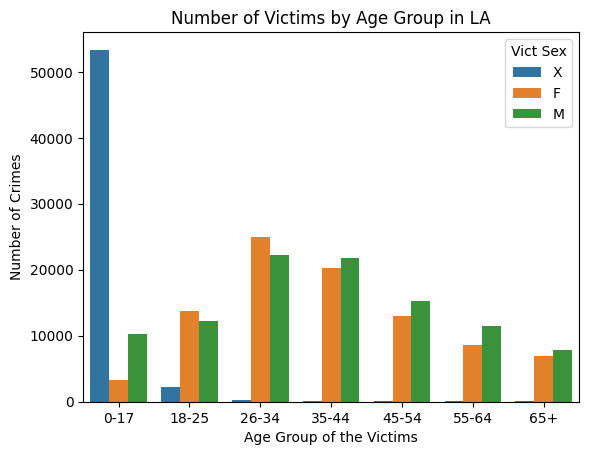

In [109]:
sns.countplot(crimes, x='Age Group', hue='Vict Sex')
plt.xlabel("Age Group of the Victims")
plt.ylabel("Number of Crimes")
plt.title('Number of Victims by Age Group in LA')

plt.show()

Most victims are aged between 0 and 17. This suggests that minors are more vulnerable to crime compared to adults. The number of victims decreases in the 18-25 age group but rises again in the 26-34 age group before declining once more.

In the age group of 0-17, most genders are listed as 'Unknown.' Females aged 18-25 and 26-34 are more vulnerable to crime than males. However, the number of male victims starts to increase from the age group of 35-44.

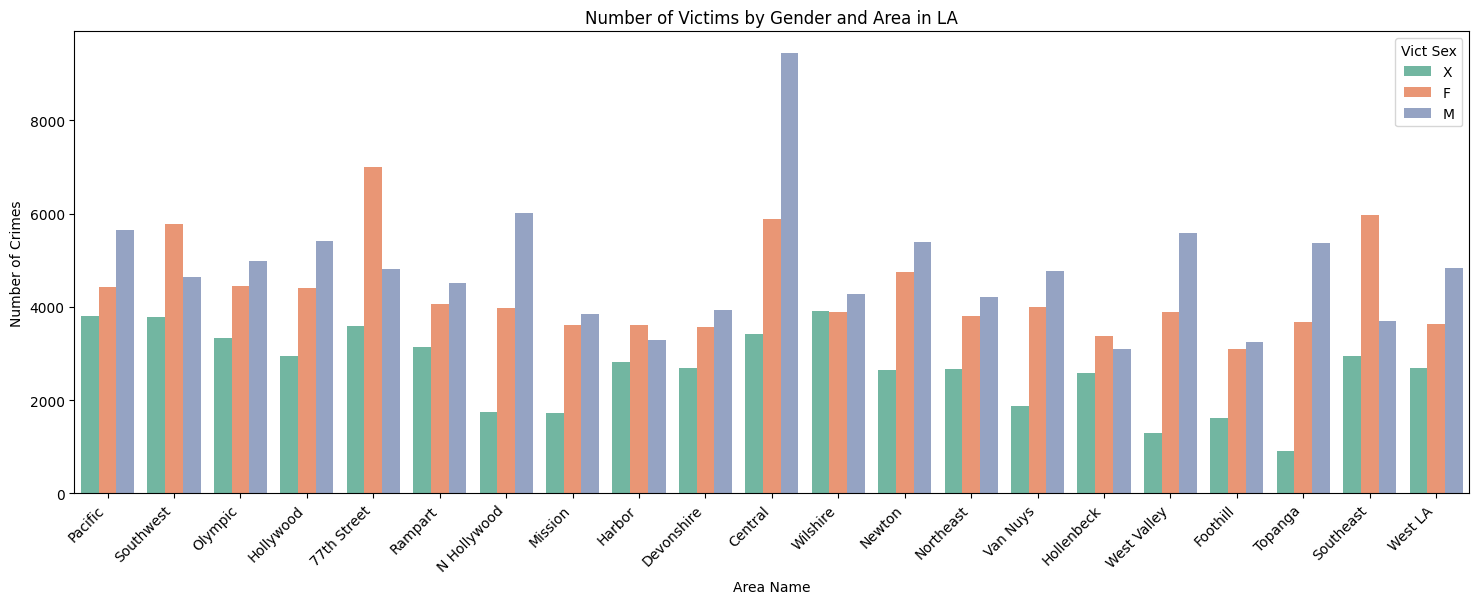

In [122]:
plt.figure(figsize=(18,6))
sns.countplot(crimes, x='AREA NAME', hue='Vict Sex', palette='Set2')
plt.xlabel("Area Name")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Crimes")
plt.title('Number of Victims by Gender and Area in LA')

plt.show()

In areas like 'Southwest,' '77th Street,' and 'Southwest,' there are more female victims. Across most areas, there are more male victims, but 'Central' has the highest number of male victims.

In [150]:
other_race = ['C', 'K', 'V', 'A', 'F', 'J', 'P', 'I', 'S', 'Z', 'U', 'L', 'G', 'D']
crimes['Vict Descent_simple'] = crimes['Vict Descent'].map(lambda x: 'O' if x in other_race else x)

crimes['Vict Descent_simple'].value_counts()

Vict Descent_simple
H    75348
X    58288
W    48587
B    35306
O    30426
Name: count, dtype: int64

In [151]:
vict_race = crimes['Vict Descent_simple'].value_counts(normalize=True).reset_index()
vict_race['proportion'] = vict_race['proportion'] * 100
vict_race

,Vict Descent_simple,proportion
0,H,30.387772
1,X,23.507491
2,W,19.595088
3,B,14.238874
4,O,12.270775


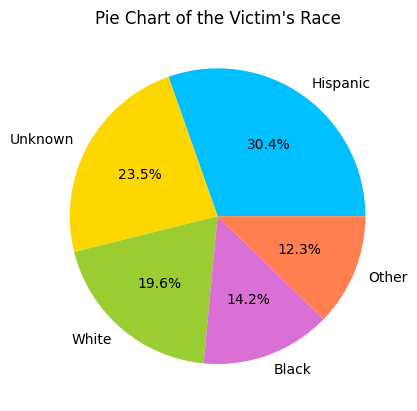

In [159]:
race_labels = ['Hispanic','Unknown','White','Black','Other']
race_size = list(vict_race['proportion'].values)

colors = ['deepskyblue','gold','yellowgreen','orchid','coral']

fig, ax = plt.subplots()
ax.pie(race_size, labels=race_labels, autopct='%1.1f%%', colors=colors)
ax.set_title("Pie Chart of the Victim's Race")

plt.show()